<a href="https://colab.research.google.com/github/Tommy3072/MineriaDeDatos/blob/main/Taller3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0      0.000000
1      0.333333
2      1.000000
3      0.000000
4      0.000000
         ...   
995    1.000000
996    0.000000
997    1.000000
998    0.000000
999    0.333333
Name: balance_control, Length: 1000, dtype: float64
0      0.029412
1      0.647059
2      0.117647
3      0.558824
4      0.294118
         ...   
995    0.117647
996    0.382353
997    0.117647
998    0.602941
999    0.602941
Name: duracion_prestamo, Length: 1000, dtype: float64
0      0.75
1      0.00
2      0.75
3      0.00
4      1.00
       ... 
995    0.00
996    0.00
997    0.00
998    0.00
999    0.75
Name: historial_credito, Length: 1000, dtype: float64
0      0.777778
1      0.777778
2      0.444444
3      0.555556
4      0.111111
         ...   
995    0.555556
996    0.222222
997    0.777778
998    0.777778
999    0.222222
Name: proposito, Length: 1000, dtype: float64
0      0.050567
1      0.313690
2      0.101574
3      0.419941
4      0.254209
         ...   
995    0.081765
996    0.198470
997   

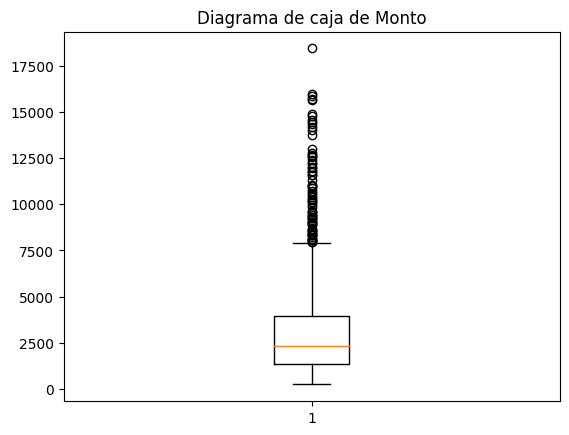

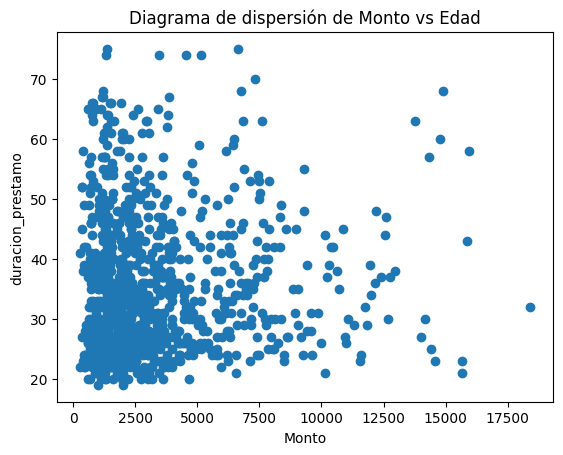

<Figure size 640x480 with 0 Axes>

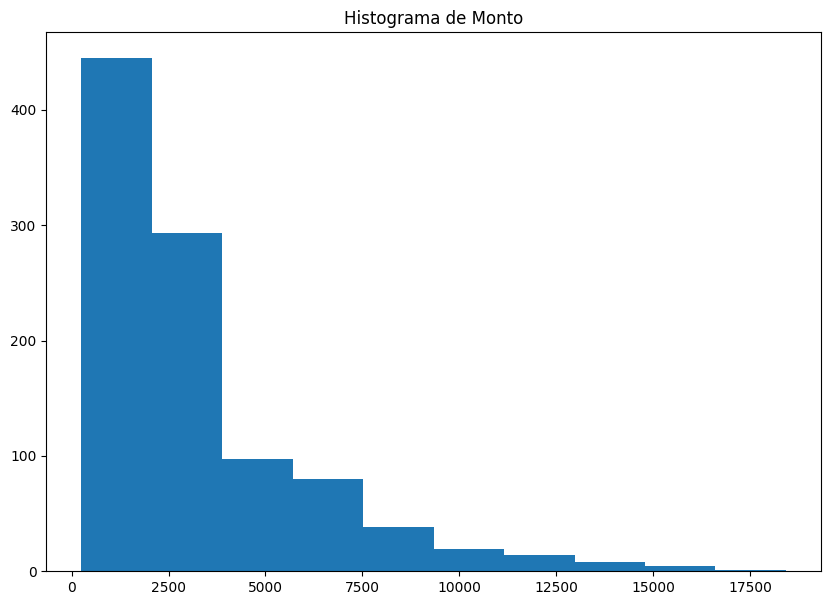

<Figure size 640x480 with 0 Axes>

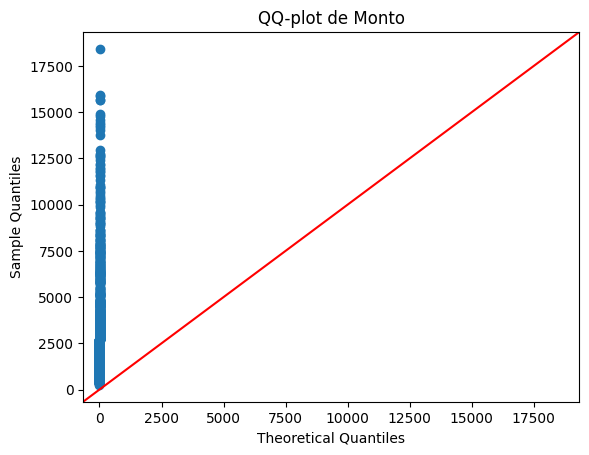

<Figure size 640x480 with 0 Axes>

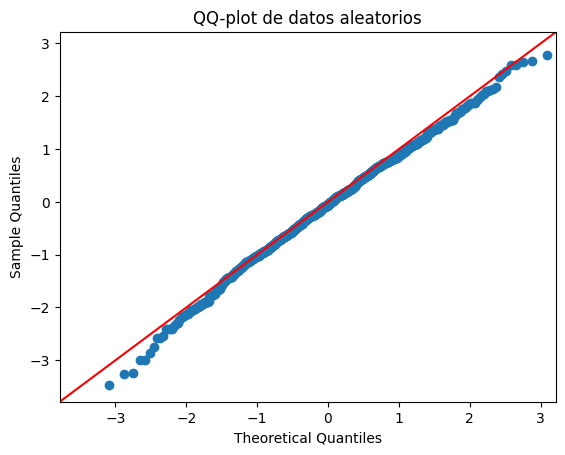

[915, 95]
[18424, 15945]
0      1169
1      5951
2      2096
3      7882
4      4870
       ... 
995    1736
996    3857
997     804
998    1845
999    4576
Name: monto, Length: 987, dtype: int64
                       balance_control  duracion_prestamo  historial_credito  \
balance_control               1.000000          -0.072013           0.128242   
duracion_prestamo            -0.072013           1.000000           0.057801   
historial_credito             0.128242           0.057801           1.000000   
proposito                     0.044481          -0.090871          -0.093185   
monto                        -0.042705           0.624984           0.066387   
saldo_ahorro                  0.225611           0.063447          -0.004248   
longitud_empleo              -0.043259           0.028078          -0.026541   
tasa_instalacion             -0.005280           0.074749           0.027073   
estado_personal               0.058828           0.093721           0.122099   
otro

In [3]:
!pip install outlier_utils
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import statsmodels.api as sm
import numpy as np
from outliers import smirnov_grubbs as grubbs

# Cargar el archivo CSV
df = pd.read_csv("credito.csv")

# Xminmax para todas las variables
minimos = df.min()
maximos = df.max()

for name, values in df.items():
    Xminmax = (df[name] - minimos[name]) / (maximos[name] - minimos[name])
    print(Xminmax)

# Alternativa usando sklearn
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df)
df_scaled = pd.DataFrame(x_scaled, columns=df.columns)
print(df_scaled)

# Estandarización normal
df_std = pd.DataFrame()
for name, values in df.items():
    df_std[name] = (df[name] - df[name].mean()) / df[name].std()
    print(df_std[name])

# Alternativa usando sklearn
scaler = preprocessing.StandardScaler()
df_std = scaler.fit_transform(df)
df_std = pd.DataFrame(df_std, columns=df.columns)
print(df_std)

# Gráfico de caja para 'monto'
plt.boxplot(df['monto'])
plt.title("Diagrama de caja de Monto")
plt.show()

# Diagrama de dispersión entre 'monto' y 'edad'
plt.figure()
plt.scatter(df['monto'], df['edad'])
plt.xlabel('Monto')
plt.ylabel('duracion_prestamo')
plt.title('Diagrama de dispersión de Monto vs Edad')
plt.show()

# Histograma de 'monto'
plt.figure()
fig, ax = plt.subplots(figsize=(10, 7))
ax.hist(df['monto'], bins=10)
plt.title("Histograma de Monto")
plt.show()

# QQ-plot de 'monto'
plt.figure()
fig = sm.qqplot(df['monto'], line='45')
plt.title("QQ-plot de Monto")
plt.show()

# QQ-plot de datos aleatorios
data = np.random.normal(0,1, 1000)
plt.figure()
fig = sm.qqplot(data, line='45')
plt.title("QQ-plot de datos aleatorios")
plt.show()

# Test de Grubbs para 'monto'
test = grubbs.test(df['monto'], alpha=.05)
indexes = grubbs.max_test_indices(df['monto'], alpha=.05)
values = grubbs.max_test_outliers(df['monto'], alpha=.05)
print(indexes)
print(values)
print(test)

# Correlaciones
pearson = df.corr(method='pearson')
spearman = df.corr(method='spearman')
kendall = df.corr(method='kendall')
print(pearson)
print(spearman)
print(kendall)